
### 데이터 분류 예측 프로세스
1. 데이터 세트 분리 ex) 데이터를 학습 데이터와 테스트 데이터로 분리
2. 모델 학습 ex) 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습
3. 예측 수행 ex) 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측
4. 평가 ex) 예측된 결과값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가



In [1]:
import sklearn
print(sklearn.__version__)

1.0.2


iris 꽃 예측을 위한 사이킷런 필요 모듈 로딩

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

데이터 셋을 로딩

In [4]:
import pandas as pd

# iris dataset을 로딩
iris = load_iris()

# iris.data는 데이터셋에서 feature만으로 된 데이터를 numpy로 가지고 있다.
iris_data = iris.data

# iris.target은 데이터셋에서 레이블(결정값) 데이터를 numpy로 가지고 있다.
iris_label = iris.target
print('iris target 값: ', iris_label)
print('iris target 명: ', iris.target_names)

# 데이터셋을 자세히 보기 위해 DataFrame으로 변환
iris


iris target 값:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명:  ['setosa' 'versicolor' 'virginica']


### scikit-learn 특징
- 다양한 머신러닝 알고리즘을 구현한 파이썬 라이브러리
- 심플하고 일관성 있는 API, 유용한 온라인 문서, 풍부한 예제
- 머신러닝을 위한 쉽고 효율적인 개발 라이브러리 제공
- 다양한 머신러닝 관련 알고리즘과 개발을 위한 프레임워크와 API 제공
- 많은 사람들이 사용하며 다양한 환경에서 검증된 라이브러리

### scikit-learn 주요 모듈
| 모듈 | 설명 |
|------|------|
| `sklearn.datasets` | 내장된 예제 데이터 세트 |
| `sklearn.preprocessing` | 다양한 데이터 전처리 기능 제공 (변환, 정규화, 스케일링 등) |
| `sklearn.feature_selection` | 특징(feature)를 선택할 수 있는 기능 제공 | 
| `sklearn.feature_extraction` | 특징(feature) 추출에 사용 |
| `sklearn.decomposition` | 차원 축소 관련 알고리즘 지원 (PCA, NMF, Truncated SVD 등)
| `sklearn.model_selection` | 교차 검증을 위해 데이터를 학습/테스트용으로 분리, 최적 파라미터를 추출하는 API 제공 (GridSearch 등)
| `sklearn.metrics` | 분류, 회귀, 클러스터링, Pairwise에 대한 다양한 성능 측정 방법 제공 (Accuracy, Precision, Recall, ROC-AUC, RMSE 등) |
| `sklearn.pipeline` | 특징 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 묶어서 실행할 수 있는 유틸리티 제공 |
| `sklearn.linear_model` | 선형 회귀, 릿지(Ridge), 라쏘(Lasso), 로지스틱 회귀 등 회귀 관련 알고리즘과 SGD(Stochastic Gradient Descent) 알고리즘 제공 |
| `sklearn.svm` | 서포트 벡터 머신 알고리즘 제공 |
| `sklearn.neighbors` | 최근접 이웃 알고리즘 제공 (k-NN 등)
| `sklearn.naive_bayes` | 나이브 베이즈 알고리즘 제공 (가우시안 NB, 다항 분포 NB 등) |
| `sklearn.tree` | 의사 결정 트리 알고리즘 제공 |
| `sklearn.ensemble` | 앙상블 알고리즘 제공 (Random Forest, AdaBoost, GradientBoost 등) |
| `sklearn.cluster` | 비지도 클러스터링 알고리즘 제공 (k-Means, 계층형 클러스터링, DBSCAN 등)


### estimator API
 
API 사용방법
1. scikit-learn 으로 부터 적절한 estimator 클래스를 임포트해서 모델의 클래스 선택
2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택
3. 데이터를 특징 배열과 대상 벡터로 배치
4. 모델 인스턴스의 fit()메서드를 호출해 모델을 데이터에 적합
5. 모델을 새 데이터에 적용
    - 지도학습: 대체로 predict() 메서드를 사용해 알려지지 않은 데이터에 대한 레입즐 예측
    - 비지도학습: 대체로 transform()이나 predict() 메서드를 사용해 데이터의 속성을 변환하거나 추론

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

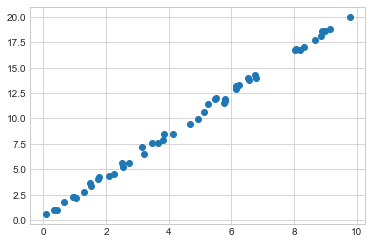

In [4]:
x = 10 * np.random.rand(50)
y = 2 * x + np.random.rand(50)
plt.scatter(x, y)

In [12]:
#  1. 적절한 estimator 클래스를 임포트해서 모델의 클래스 선택
from sklearn.linear_model import LinearRegression

In [13]:
# 2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [9]:
x # array 형태

array([8.19903221, 2.24155396, 4.14449783, 9.15558811, 2.73318236,
       6.15869355, 2.53832459, 0.94691583, 0.32879797, 2.4954682 ,
       9.77918765, 6.52466088, 3.8498226 , 6.75431881, 5.480629  ,
       3.65999077, 5.23694067, 2.10618088, 1.76040662, 3.80062471,
       6.23007138, 8.99828256, 3.47473383, 0.43505892, 5.51702786,
       5.12882549, 5.80378405, 0.6431158 , 4.94001703, 8.06712738,
       0.96119471, 5.75022955, 6.13281747, 3.21555475, 8.65135286,
       1.28981241, 1.52229688, 6.57176391, 1.75097252, 0.06676857,
       8.88446376, 1.48895778, 1.03261975, 5.79360249, 4.67718366,
       8.85181285, 6.79463466, 8.32258949, 8.02236708, 3.1553908 ])

In [14]:
# 3. 데이터를 특징 배열과 대상 벡터로 배치
X = x[:, np.newaxis] # 축을 추가
X

array([[8.19903221],
       [2.24155396],
       [4.14449783],
       [9.15558811],
       [2.73318236],
       [6.15869355],
       [2.53832459],
       [0.94691583],
       [0.32879797],
       [2.4954682 ],
       [9.77918765],
       [6.52466088],
       [3.8498226 ],
       [6.75431881],
       [5.480629  ],
       [3.65999077],
       [5.23694067],
       [2.10618088],
       [1.76040662],
       [3.80062471],
       [6.23007138],
       [8.99828256],
       [3.47473383],
       [0.43505892],
       [5.51702786],
       [5.12882549],
       [5.80378405],
       [0.6431158 ],
       [4.94001703],
       [8.06712738],
       [0.96119471],
       [5.75022955],
       [6.13281747],
       [3.21555475],
       [8.65135286],
       [1.28981241],
       [1.52229688],
       [6.57176391],
       [1.75097252],
       [0.06676857],
       [8.88446376],
       [1.48895778],
       [1.03261975],
       [5.79360249],
       [4.67718366],
       [8.85181285],
       [6.79463466],
       [8.322

In [15]:
# 4. 모델 인스턴스의 fit() 메서드를 호출해 모델을 데이터에 적합
model.fit(X, y)

LinearRegression()

In [12]:
model.coef_

array([1.99737793])

In [13]:
model.intercept_

0.4796425547594563

In [17]:
# 5. 모델을 새 데이터에 대해서 적용
xfit = np.linspace(-1, 11) # 새 데이터를 numpy .linspace로 만들고
print(xfit)
Xfit = xfit[:, np.newaxis] # 특징벡터로 만들어줌
yfit = model.predict(Xfit) # 예측

[-1.         -0.75510204 -0.51020408 -0.26530612 -0.02040816  0.2244898
  0.46938776  0.71428571  0.95918367  1.20408163  1.44897959  1.69387755
  1.93877551  2.18367347  2.42857143  2.67346939  2.91836735  3.16326531
  3.40816327  3.65306122  3.89795918  4.14285714  4.3877551   4.63265306
  4.87755102  5.12244898  5.36734694  5.6122449   5.85714286  6.10204082
  6.34693878  6.59183673  6.83673469  7.08163265  7.32653061  7.57142857
  7.81632653  8.06122449  8.30612245  8.55102041  8.79591837  9.04081633
  9.28571429  9.53061224  9.7755102  10.02040816 10.26530612 10.51020408
 10.75510204 11.        ]


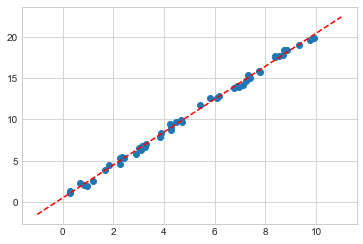

In [18]:
plt.scatter(x, y)
plt.plot(xfit, yfit, '--r')

In [19]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes.keys()) 

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [20]:
print(diabetes.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [21]:
print(diabetes.target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [22]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [25]:
print(diabetes.feature_names)
print(diabetes.target_filename)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
diabetes_target.csv.gz


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X_train, X_test, y_tr ain, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)

print(model.score(X_train, y_train)) # 학습 데이터 점수
print(model.score(X_test, y_test)) # 평가 데이터 점수

0.5566490350139277
0.3843412021979211


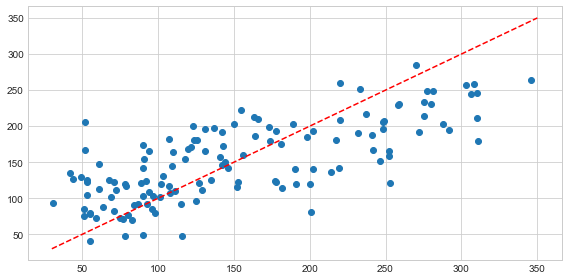

In [31]:
import matplotlib.pyplot as plt

predicted = model.predict(X_test)
expected = y_test
plt.figure(figsize=(8, 4))
plt.scatter(expected, predicted)
plt.plot([30, 350], [30, 350], '--r')
plt.tight_layout() 

### cross_val_score(): 교차검증

In [19]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(model, diabetes.data, diabetes.target, cv=5)

print(scores) # 교차 검증 정확도
print(np.mean(scores), np.std(scores)) # 평균, 표준편차

[0.42955643 0.52259828 0.4826784  0.42650827 0.55024923]
0.48231812211149394 0.04926619776563214


### GridSearchCV: 교차 검증과 최적 하이퍼 파라미터 찾기
- 훈련 단계에서 학습한 파라미터에 영향을 받아서 최상의 파라미터를 찾는 일은 항상 어려운 문제
- 다양한 모델의 훈련 과정을 자동화하고 교차 검사를 사용해 최적 값을 제공하는 도구 필요

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pandas as pd

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

gs = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=10)
result = gs.fit(diabetes.data, diabetes.target)

print(result.best_score_) # 최적 점수
print(result.best_params_) # 최적 파라미터
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

0.4633240541517593
{'alpha': 0.1}
Ridge(alpha=0.1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000700,0.001187,0.000100,0.000300,0.001,{'alpha': 0.001},0.554415,0.233686,0.356799,0.620259,0.267033,0.619397,0.419907,0.433019,0.433431,0.684984,0.462293,0.145848,3
1,0.000400,0.000490,0.000300,0.000458,0.01,{'alpha': 0.01},0.546297,0.244132,0.368901,0.613732,0.271717,0.623089,0.426074,0.424759,0.429484,0.680912,0.462910,0.141446,2
2,0.000401,0.000491,0.000100,0.000300,0.1,{'alpha': 0.1},0.526550,0.244987,0.383530,0.606594,0.286094,0.618033,0.431230,0.441788,0.431968,0.662466,0.463324,0.132681,1
3,0.000300,0.000458,0.000100,0.000300,1,{'alpha': 1},0.421593,0.168442,0.358004,0.512608,0.284928,0.514264,0.388246,0.484448,0.396502,0.525132,0.405417,0.108385,4
4,0.000401,0.000492,0.000099,0.000296,10,{'alpha': 10},0.159386,-0.081177,0.152190,0.165690,0.119349,0.186933,0.158147,0.203748,0.153627,0.189440,0.140733,0.077298,5
5,0.000500,0.000500,0.000100,0.000300,100,{'alpha': 100},0.012468,-0.234480,0.013522,-0.012820,0.004838,0.022647,0.022028,-0.009908,0.015589,0.026427,-0.013969,0.074561,6
6,0.000300,0.000458,0.000200,0.000400,1000,{'alpha': 1000},-0.009602,-0.258118,-0.007849,-0.038479,-0.012933,-0.000932,0.001768,-0.042679,-0.004652,0.002744,-0.037073,0.075191,7


- multiprocessing을 이용한 GridSearchCV

In [22]:
import multiprocessing
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()

param_grid = [
    {
        'penalty': ['l1','l2'],
        'C': [0.5, 1.0, 1.5, 1.8, 2.0, 2.4]
    }
]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
result = gs.fit(iris.data, iris.target)

print(result.best_score_) # 최적 점수
print(result.best_params_) # 최적 파라미터
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

0.9800000000000001
{'C': 2.4, 'penalty': 'l2'}
LogisticRegression(C=2.4)


C:\Users\lab-2201\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lab-2201\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lab-2201\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\lab-2201\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise Val

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000501,0.000501,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.042201,0.003736,0.000300,0.000458,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",1.0,0.933333,1.0,0.933333,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.966667,0.033333,6
2,0.000100,0.000300,0.000000,0.000000,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
3,0.038199,0.006838,0.000900,0.000700,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,2
4,0.000100,0.000301,0.000000,0.000000,1.5,l1,"{'C': 1.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,0.033199,0.006015,0.000501,0.000501,1.5,l2,"{'C': 1.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,2
6,0.000300,0.000459,0.000000,0.000000,1.8,l1,"{'C': 1.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
7,0.033800,0.003996,0.000600,0.000490,1.8,l2,"{'C': 1.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,2
8,0.000400,0.000490,0.000000,0.000000,2.0,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
9,0.032000,0.003346,0.000400,0.000490,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,2


### preprocessing 데이터 전처리 모듈
- 데이터의 특징 스케일링(feature scaling)을 위한 방법으로 표준화(Standardization)와 정규화(Normalization) 사용
- 표준화 방법
\begin{equation}
x_i^{'} = \frac{x_i-mean(x)}{stdev(x)}
\end{equation}
- 정규화 방법
\begin{equation}
x_i^{'} = \frac{x_i-min(x)}{max(x)-min(x)}
\end{equation}
- scikit-learn 에서는 개별 벡터 크기를 맞추는 형태로 정규화

### StandardScaler: 표준화 클래스

In [23]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [25]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris.target, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.score(X_train, y_train)) # 훈련 데이터 점수
print(model.score(X_test, y_test)) # 평가 데이터 점수

0.9714285714285714
0.9333333333333333


### MinMaxScaler: 정규화 클래스

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [28]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris.target, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.score(X_train, y_train)) # 훈련 평가 점수
print(model.score(X_test, y_test)) # 평가 데이터 점수

0.9428571428571428
0.9111111111111111
